# Chapter 9: Unsupervied Learning Techniques
This work is partialy combined text and code from the book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) is only supposed to be used as reference and is recommended to follow along with a copy of the Book puchased.

# Clustering
## K-Means
It will try to find each blob's center and assign each instance to the closest blob. All it cares about when assigning an instance to a cluster is the distance to the centroid.

**Note**: You have to specify the number of clusters $k$ that the algoithm must find.
- ***label*** is the index of the cluster that this instance gets assigned to by the algorithm.

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_cluster=k)

#each instance was assigned to one of the five clusters.
y_pred = KMeans.fit_predict(X)

`labels_`: Copy of labels of the instances it was trained on.

In [ ]:
y_pred is kmeans.labels_

`cluster_centroids_`: All centroid the algorithm found.

In [ ]:
kmeans.cluster_centers_

#### Assign new instances to the cluster whose centroid  is closest

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

**Hard Clustering**: Assigning each instance to a single cluster

**Soft Clustering**: give each instance a score per cluster.

`transform()` method measures the distance from each instance to every centroid.

In [ ]:
kmeans.transform(X_new)

### How KMeans work?
1. **Place the centroids randomly** 
   1. By picking $k$ instances at random and using their locations as centroids
2. **Label the instances**
   2. By assigning each of them to the cluster whose centroid is closest.
3. **Update the centroids.**
   3. By computing the mean of the instances for each cluster.
4. Repeat Step 2, 3; **Until centroid stops Moving.**

### Centroid Intialization methods
Athough the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): **whether it does or not depends on the centroid inititlization.**

#### If you happen to know approximately where the centroids should be, 
- set the `init` hyperparameter to a NumPy array containing the list of centroids, and 
- set `n_init = 1`.

#### Run algorithm with different Random Initialization and keep the best solution
`n_init` control the bumber of random initialization. By default set to `10`, which means that the whole algorithm, runs 10 times when you call `fit()`, and Scikit-learn keeps the best solution.
The way Scikit-learn know which solution is the best is by use of a performance metric, <mark>*inertia*</mark>

Model's **Inertia** is the means squared distance between each instance and its closest centroid.
- Model with the lowest inertia is kept.
- accessible via `inertia_` instance variable

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1) 

In [ ]:
kmeans.inertia_

`score()` method returns the negative inertia.

Why negative? Because a predictor's score() must always respect Scikit-learn's <mark>"greater is better" rule</mark>: 

**if a predictor is better than another, its `score()` method should return a greater score.**

In [ ]:
kmeans.score(X)

### KMeans++
Select centroid that are distant from one another. 

#### KMeans++ Initialization algorithm:
1. Take one centroid $c^{(1)}$, chosen uniformly at random from the dataset.
2. Take a new centroid $c^{(i)}$, choosing an instance $x^{(i)}$ with probability $$D\big(x^{(i)}\big)^2 \big/ \sum^{m}_{j=1}D\big(x^{(j)}\big)^2$$<mark>where $D\big(x^{(i)}\big)$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already choosen.</mark> This probability distribution ensures that the instances farther away from already chosen centroids are much more likely to be selected as centroids.
3. Repeat the previous step until all $k$ centroids have been chosen.

`KMeans` class uses this initialization method by default. If want the original random initilization method; set `init` hyperparameter to "random".

### Accelerated K-Means
An improvement to K-Means algorithm proposed by Charles Elkan. Default K-Means algorithm Scikit-learn uses You can force to use the original one by setting the `algorithm` hyperparameter to `"full"`.

It considerably accelerates the algorithm by avoiding many unnecessary calculations. It is achieved as:
- Exploiting **Triangle Inequality** (i.e., that a straight line is always the shortest distance between two points.
- By keeping track of lower and upper bounds for distances between instances and centroids.

### Mini-batch k-Means
Proposed in 2010 by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using mini batches, moving the the centroids just sligthly att each iteration.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

### Finding the optimal number of clusters
#### When plotting the inertia as a  function of the number of clusters $k$, the curve often contains an inflextion point called the "elbow".  Use the $K$ value at the elbow.

#### Silhouette Score
Mean of *silhouette coefficient* over all the instances.

An instance's Silhouette Coefficient can be defined as $$\frac{(b-a)} {max(a, b)}$$

where,
- $a$ is the mean distance to the other instances in the same cluster. (i.e., <mark>mean intra-cluster distance</mark>)
- $b$ is the mean nearest-cluster distance (i.e., <mark>the mean distance to the instances of the next closest cluster, defined as the one that minimizes $b$</mark>, excluding the instance's own cluster)

Silhoutte coefficient can vary between -1 and +1;
- Close to +1 means that the instance is well inside its own cluster and far away from other cluster.
- Close to 0 means that it is close to a cluster boundary
- Close to -1 means that the instance may have been assigned to the wrong instances.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

#### Silhouette Diagram
Plot every instance's silhouette coeffcient, sorted by
- the cluster they are assigned to 
- and by the value of the coefficient per cluster.

Each diagram contains one knife shape per cluster. 
- Height indicates the <mark>number of instances the cluster</mark> contains.
- Width represents the <mark>sorted silhoutte coefficients of the instances in the cluster</mark> (**wider is better**)
- Dashed line indicates the <mark>mean silhouette coefficient</mark>.

**How to interpret it?**

When most of the instances in a cluster have a lower coefficient than this score (represented by dashed line) (i.e., if many of te instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.

### Limits of K-Means
K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes.

**It is Important to scale the input features before you run K-Means**, or the clusters may be stretched and K-Means will perform poorly. Although it does not gurantee that all clusters will be nice and spherical, but it generally improves things.

### Using Clustering for Image Segmentation
- **Image Segmentation**: Task of partitioning an image into multiple segments.
- **Semantic Segmentation**: All pixels that are part of the same <mark>object type</mark> get assigned to the same segment.
    
   - In a self driving car's vision system, all pixels that are part of a pedestrian's iamge might be assigned to the "pedestrian" segment (there would be one segment containing all the pedestian)
- **Instance Segmentation**: All pixels that are part of the same <mark>individual object</mark> are assigned to the same segment.
    
    - There would be a different segment for each pedestrian.

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread # or 'from imagio import imread'

image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
image.shape

(533, 800, 3)

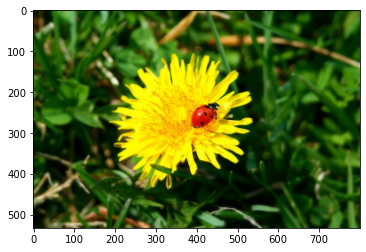

In [ ]:
plt.imshow(image)

The image is represented as 3D array. The first dimension's size is the height, second is width, third being number of color channels, in this case red, green, and blue(rgb).

The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means.

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
import numpy as np
x = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,19]]])
x.shape

(2, 3, 3)

In [ ]:
x.reshape(-1,3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 19]])

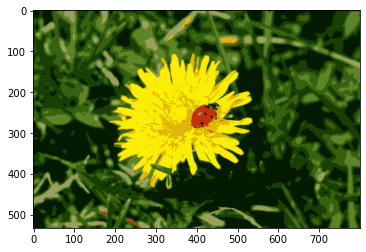

In [ ]:
plt.imshow(segmented_img)

### Using Clustering for preprocessing

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
 
log_reg = LogisticRegression(max_iter=20000)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9488888888888889

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_Reg', LogisticRegression(max_iter=20000)),
])
pipeline.fit(X_train, y_train).score(X_test, y_test)

0.9666666666666667

In [ ]:
# We can do better; 
# Finding the best n_clusters value for kmeans
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.6s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.5s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.8s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   1.7s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   2.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   1.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   1.5s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   1.5s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ............................ kmeans__n_clusters=19, total=  10.5s
[CV] kmeans__n_clusters=20 ...........................................
[CV] ............................ kmeans__n_clusters=20, total=   8.7s
[CV] kmeans__n_clusters=20 ...........................................
[CV] ............................ kmeans__n_clusters=20, total=   9.0s
[CV] kmeans__n_clusters=20 ...........................................
[CV] ............................ kmeans__n_clusters=20, total=   5.3s
[CV] kmeans__n_clusters=21 ...........................................
[CV] ............................ kmeans__n_clusters=21, total=   6.1s
[CV] kmeans__n_clusters=21 ...........................................
[CV] ............................ kmeans__n_clusters=21, total=   8.3s
[CV] kmeans__n_clusters=21 ...........................................
[CV] ............................ kmeans__n_clusters=21, total=   5.3s
[CV] kmeans__n_clusters=22 ...........................................
[CV] .

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ............................ kmeans__n_clusters=23, total=  13.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   5.5s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   7.4s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   7.2s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   4.4s
[CV] kmeans__n_clusters=25 ...........................................
[CV] ............................ kmeans__n_clusters=25, total=   7.2s
[CV] kmeans__n_clusters=25 ...........................................
[CV] ............................ kmeans__n_clusters=25, total=   7.3s
[CV] kmeans__n_clusters=25 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=42, total=   6.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   4.2s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   5.1s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   5.0s
[CV] kmeans__n_clusters=44 ...........................................
[CV] ............................ kmeans__n_clusters=44, total=   5.5s
[CV] kmeans__n_clusters=44 ...........................................
[CV] ............................ kmeans__n_clusters=44, total=   4.2s
[CV] kmeans__n_clusters=44 ...........................................
[CV] ............................ kmeans__n_clusters=44, total=   4.9s
[CV] kmeans__n_clusters=45 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=62, total=   3.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   5.1s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   5.3s
[CV] kmeans__n_clusters=63 ...........................................
[CV] ............................ kmeans__n_clusters=63, total=   3.0s
[CV] kmeans__n_clusters=63 ...........................................
[CV] ............................ kmeans__n_clusters=63, total=   4.9s
[CV] kmeans__n_clusters=63 ...........................................
[CV] ............................ kmeans__n_clusters=63, total=   3.2s
[CV] kmeans__n_clusters=64 ...........................................
[CV] ............................ kmeans__n_clusters=64, total=   6.8s
[CV] kmeans__n_clusters=64 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=81, total=   3.7s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   8.3s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   3.1s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   4.4s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   3.6s
[CV] kmeans__n_clusters=83 ...........................................
[CV] ............................ kmeans__n_clusters=83, total=   2.9s
[CV] kmeans__n_clusters=83 ...........................................
[CV] ............................ kmeans__n_clusters=83, total=   3.2s
[CV] kmeans__n_clusters=83 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 26.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_Reg',
                                        LogisticRegression(max_iter=20000))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 72}

### Using Clustering for Semi-Supervised Learning
When we have plenty of unlabeled instances and very few labeled instances.

In [ ]:
# Let's train Lg model on a sample of 50 labled instances from the digits dataset.
n_labeled=50
log_reg = LogisticRegression(max_iter=20000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8111111111111111

Let's cluster the training set into 50 clusters. Then for each cluster, let's find the image closest to the centroid. We will call these images the *representation images*.

In [ ]:
k=50
kmeans = KMeans(n_clusters=50)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digits_idx = np.argmin(X_digits_dist, axis=0)

# 50 representative digit images (one per cluster)
X_representative_digits = X_train[representative_digits_idx]

In [ ]:
### dist of each instance from all 50 centroids stored in each row.
X_digits_dist.shape

(1347, 50)

In [ ]:
kmeans.labels_.shape

(1347,)

<IPython.core.display.Javascript object>


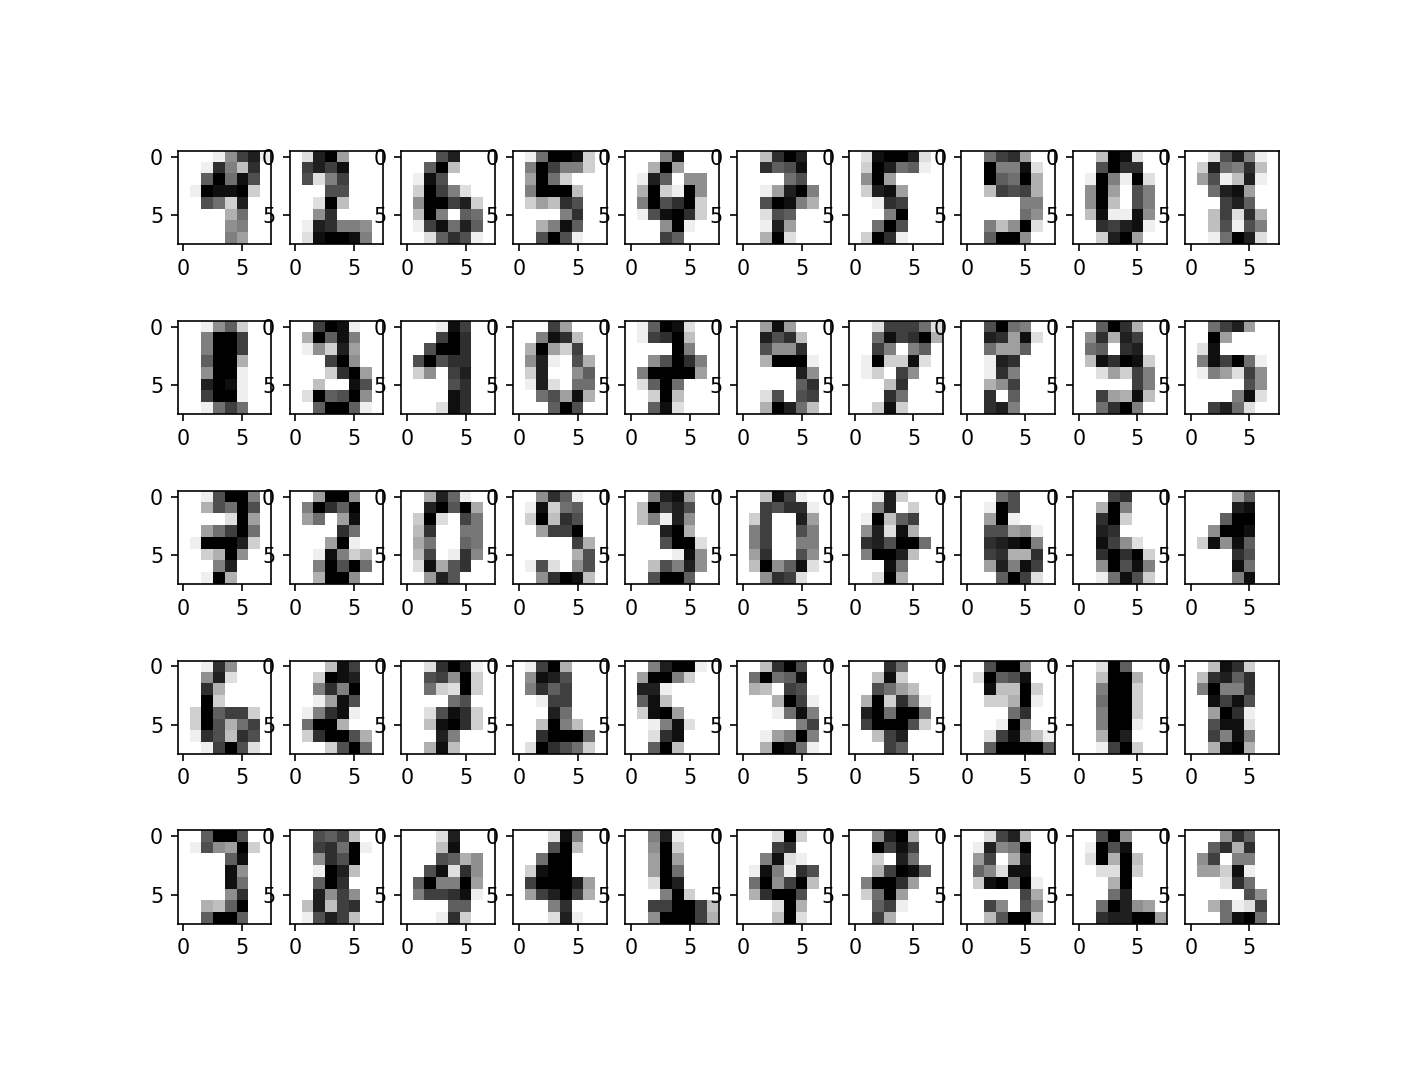

In [ ]:
%matplotlib notebook
fig,ax = plt.subplots(5, 10)

for i in range(5):
    for j in range(10):
        ax[i,j].imshow(X_representative_digits[(10*i)+j].reshape(8, 8), cmap='binary')

Let's look at these images and manually label them.

In [ ]:
# Now we have a dataset with just 50 labeled instances.
# But instead of being random instances, each one of them representative image of its cluster
y_representative_digits = np.array([9, 2, 6, 5, 4, 7, 5, 9, 0, 8,
                                    2, 3, 1, 0, 7, 9, 7, 3, 9, 5,
                                    7, 2, 0, 9, 3, 0, 4, 6, 6, 1,
                                    6, 2, 7, 2, 5, 3, 4, 2, 1, 8,
                                    3, 8, 4, 4, 1, 4, 7, 9, 2, 3])

In [ ]:
log_reg = LogisticRegression(max_iter=20000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8955555555555555

#### Label Propagation
Propagate the labels to all the other instances in the same cluster.

I was already thinking? Why they didn't did this at first place.



In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    # Kmeans.labels_ stores the cluster label for each instance
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
# Now let's train the model again and look at its performance
log_reg = LogisticRegression(max_iter=20000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.88

The problem is that we propagated each representative instance's label to all the instances in the same cluster. including the instances located close to the cluster boundaries which are more likely to be mislabeled.

Let's see what hapens if we only propagate the labels to the 20% of the instances that are closest to the centroids.

In [ ]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
# now let's train LG on this data
log_reg = LogisticRegression(max_iter=20000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.11333333333333333

### Active Learning 
When a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm request them.
Many different strategies to do; most common **Uncertainity sampling**

1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
2. The instances for which the model is most uncertain (i.e., when its estimated probability is lowest) are given to the expert to be labeled.
3. You iterate this process until all the performance improvement stops being worth the labelling effort.

Other strategies include labeling the instances that would result in the largest model change, or the largest drop in the model's validation error, or the instances that different models disagree on.

## DBSCAN
This algorithm defines clusters as continuous regions of high density.

### How it works?
- For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ from it. This region is called instance's $\epsilon$**-neighborhood**.
- If an instance has at least `min_samples` instances in its $\epsilon$-neighborhood (including itself), then it is considered as **core instance**.
- All the instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therfore, a long sequence of neighboring core instances forms a single cluster.
- Any instance that is not a core instance and does not have one in itsneighborhood is considered an *anomaly*.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

dbscan.labels_[:20]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

- `labels_` stores labels of all the instances.
- `core_sample_indices_` stores indices of the core instances.
- `components_` core instances themselves.

In [ ]:
len(dbscan.core_sample_indices_)

1000

In [ ]:
dbscan.core_sample_indices_[:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [ ]:
dbscan.components_

array([[ 0.22494761, -0.1074315 ],
       [-0.05240677,  0.23884566],
       [ 0.47381941,  0.8685589 ],
       ...,
       [-1.0515638 ,  0.1218746 ],
       [-0.08418621,  0.29653872],
       [ 2.01648049,  0.15058592]])

DBSCAN class does not have `predict()` method, although it has a `fit_predict()` method. In other words, it cannot predict which cluster a new instance belong to.

In [ ]:
# Moreover, it's not hard to implement.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now given a few new instances, we can predict which cluster they most likely belong to and even estimate a probablity for each cluster.

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [ ]:
knn.predict_proba(X_new)

array([[0.22, 0.78],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ]])

It is fairly straight-forward to introduce a maximum distance, in which case th two instances that are far away from both cluster are classified as anomalities. To do this use the `kneighbors()` method of the `KNeighborsClassifier`.

#### `kneighbors()`
Given a set of instances, it returns <mark>the distances</mark> and the <mark>indices of the $k$ nearest neighbors</mark> in the training set ( two matrices, each with $k$ columns)

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

In [ ]:
dbscan.labels_[y_pred_ids]

array([[1],
       [0],
       [1],
       [0]], dtype=int64)

In [ ]:
y_dist

array([[0.41504532],
       [0.02679622],
       [0.06301139],
       [0.4523157 ]])

# Gaussian Mixtures
A *Gaussian mixture model (GMM)* is a probalistic model that assumes that instances were generated from a mixture of several gaussian distribution whose parameters are unknown.

All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid.

The dataset $X$ is assumed to have generated through the following probablistic process:
- For each instance, a cluster is picked randomly from among $k$ clusters. The probability of choosing the $j^{th}$ cluster is defined by the cluster's weight, $\phi^{(j)}$. The <mark>index of the cluster chosen for the $i^{th}$ instance</mark> is noted <mark>$z^{(i)}$</mark>.
- If $z^{(i)}=j$, meaning the $i^{(th)}$ instance has been assigned to the $j^{th}$ cluster, the location $x^{(i)}$ of the this instance is sampled randomly from the Gaussian distribution with <mark>mean $\mu^{(j)}$</mark> and <mark>covariance matrix $\Sigma^{(j)}$</mark>. This is noted $x^{(i)}\sim\mathbb{N}\big(\mu^{(j)},\Sigma^{(j)}\big)$.

Given the dataset $X$, you typically want to start by estimating the weights $\phi$ and all the distribution parameters $\mu^{(1)}$ to $\mu^{(k)}$ and $\Sigma^{(1)}$ to $\Sigma^{(k)}$.

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=20)
gm.fit(X) # make_moons X, y

GaussianMixture(n_components=3, n_init=20)

In [ ]:
gm.weights_

array([0.20476003, 0.59847658, 0.19676339])

In [ ]:
gm.means_

array([[ 1.74474552, -0.05883205],
       [ 0.49305738,  0.25386019],
       [-0.75816959,  0.54931737]])

In [ ]:
gm.covariances_

array([[[ 0.05256283,  0.06189112],
        [ 0.06189112,  0.08790778]],

       [[ 0.17459153, -0.10810368],
        [-0.10810368,  0.28926303]],

       [[ 0.04836583,  0.05741549],
        [ 0.05741549,  0.08392983]]])

This class relies on *Expectation-Maximization* (EM) algoithm, which has many similarties with K-Means.

It also initizes the cluster parameters randomly, then it repeats two steps until convergence,
- first assigning instances to the clusters (this is called <mark>*maximization step*</mark>
- Then updating the clusters (This is called <mark>*maximization step*</mark>.

Think of EM as the generalization of K-Means that not only finds the <mark>cluster centers ($\mu^{(1)}$ to $\mu^{(k)}$)</mark>, but also their <mark>size, shape and orientation ($\Sigma^{(1)}$ to $\Sigma^{(k)}$)</mark>, as well as their <mark>relative weights ($\phi^{(1)}$ to $\phi^{(k)}$)</mark>.

Though, EM uses **soft cluster assignments**, not hard assignments.

For each instance, during the expectation step, the algorithm estimates the probablity that it belongs to each cluster (based on current cluster parameters). Then, during the maximization step, each cluster is updated using ***all*** the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called *responsibilities* of the clusters for the instances.

Unfortunately, just like K-Means, EM can end up converging to poor soltions, so it needs to run several time, so set `n_init` parameter to something useful, By default it is 1.

In [ ]:
# You can check whether or not the algorithm converge
gm.converged_

True

In [ ]:
# and how many iterations it took
gm.n_iter_

18

#### Hard clustering
The model can easily assign each instance to the most likely cluster; use `predict()`

#### Soft Clustering
Or estimate the probability that it belongs to particular cluster; use `predict_proba()`.

In [ ]:
gm.predict(X)[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 2, 1], dtype=int64)

In [ ]:
gm.predict_proba(X)[:10]

array([[2.62698484e-053, 1.00000000e+000, 3.92581972e-050],
       [2.33934144e-097, 1.00000000e+000, 2.95744190e-020],
       [1.57411772e-091, 1.00000000e+000, 8.22485851e-025],
       [9.99304221e-001, 6.95779148e-004, 9.48497210e-211],
       [9.99697811e-001, 3.02189156e-004, 1.89278201e-194],
       [2.11141126e-019, 1.00000000e+000, 7.14879509e-099],
       [2.57553137e-057, 1.00000000e+000, 2.91045341e-046],
       [5.42374379e-001, 4.57625621e-001, 1.40316504e-179],
       [1.15142755e-219, 1.65098646e-003, 9.98349014e-001],
       [1.85849654e-126, 1.00000000e+000, 3.02799402e-011]])

A Gaussian mixture model is a *generative model*, meaning you can sample new instances from it (ordered by cluster index)

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[ 1.95119037, -0.04384021],
       [ 1.68188266, -0.16589932],
       [ 1.03139366,  0.22899897],
       [ 0.08308128,  0.36716165],
       [ 0.43689003, -0.21646465],
       [-0.89260989,  0.60995892]])

`score_samples()` for each instance it is given this method estimates the <mark>log of *probability density function* (PDF)</mark>.

If you compute the exponential of these score, you get the value of the PDF at the location of the given instances.

In [ ]:
gm.score_samples(X)[:10]

array([-1.55795594, -1.85871679, -1.5450052 , -0.04990167, -1.19724765,
       -1.44454056, -1.85594373, -1.9069014 , -0.18579111, -1.56626303])

#### Unfortunately real-life data is not always so Gaussian and low-dimensional
Wm can struggle to converge, so reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn.
- Limit the range of shapes and orientations that the cluster can have
  - Impose contraints on the covariance matrices. Set `covariance_type` hyperparameter to one these values:
    
     - `"spherical"`: <mark>All cluster must be spherical</mark>, but they can have different diameters.(i.e., <mark>different variances</mark>)
     - `"diag"`: Clusters can take <mark>any ellipsoidal shape of any size</mark>, but the ellipsoid's axes must be parallel to the coordinate axes (i.e., <mark>the covariance matrices must be diagonal</mark>)
     - `"tied"`: All clusters must have the <mark>same ellipsoidal shape</mark>, size, and orientation (i.e., <mark>all clusters share the same covariance matrix</mark>)
     
By default, `covariance_type` is equal to `"full"`, i.e., clusters can take any shape, size, and orientation.

The computational complexity of training a `GaussianMixture` model depends on number of instances $m$, number of dimensions $n$, number of clusters $k$ and the contraints on the covariance matrices.

|| Computational Complexity|
|---|---|
|If `covariance_type` is `"spherical"` or `"diag"` | $O(kmn)$
|If `covariance_type` is `"tied"` or `"full"` | $O(kmn^2+kn^2)$

## Anomaly Detection Using Gaussian Mixtures
*Anomaly detection* (as called *outlier detection*) is the task of detecting instances that deviate strongly from the norm.
This instances are calles *anomalies*, or *outliers*. Normal instances are called *inliers*.

**You must define what density threshold you want to use**.

|||
|---|---|
|Too many False Positives| **Lower the Threshold**|
|Too many False Negatives| **Increase the Threshold**|

Here is how you would identify the outliers using the forth percentile lowest density as the threshold (i.e., approximately 4% of the instances will be flagged as anomalities)

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [ ]:
density_threshold

-2.207307615275526

Gaussian Mixture models try to fit all the data, including the outliers, so if you have many of them, it will bias the model's view of "normality". If this happens try:
- Try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned dataset.
- Use robust covariance estimation methods (see the `EllipticEnvelope` class)

## Selecting the Number of Clusters
Inertia and silhouette score are not possible to use beacuse they are not reliable when the clusters are not spherical or have different sizes. Instead you try to find the model that <mark>**minimizes** a *theoretical information criterion*</mark>, such as ***Bayesian Information Criterion*** (BIC) or the ***Akaike Information Criterion*** (AIC)

$$BIC = log(m)p - 2 log (\hat{L})$$

$$AIC = 2p - 2 log(\hat{L})$$

In these equations:
- $m$ is the number of instances, as always
- $p$ is the number of parameters learned by the model
- $\hat{L}$ is the maximised value of the *likelihood function* of the model.

Both BIC and AIC penalize the model having more parameters to learn and reward models that fit the data well, often select the same model. When they differ, the model selected by the BIC tends to be simpler(few parameters) than the one selected by the AIC, but tends to not fit the data quite as well (especially true for larger datasets)

### Likelihood Function
Given a statistical model with parameters $\theta$,
- **"Probability"**: how plausible a future outcome $x$ is, given the parameter values $\theta$
- **"Likelihood"** : how plausible a particular set of parameter values $\theta$ are, given the outcome $x$ is known.

In [ ]:
gm.bic(X)

2748.208558173653

In [ ]:
gm.aic(X)

2664.7767184309564

## Bayesian Gaussian Mixture Models
`BayeianGaussianMixture` capable of giving weights equal (or close) to zero to unnecessay clusters.

Set the number of clusters `n_components` to a value that you have good reason to believe is greater than the optimal number of clusters.

In [ ]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.13, 0.15, 0.12, 0.12, 0.12, 0.15, 0.11, 0.  , 0.11, 0.  ])

In this model, the cluster parameters (including the weights, means, and covaraince matrices) are not treated as fixed model parameters anymore, but as a latent random variables, like the cluster assignments. So $z$ now includes both the cluster parameters and the cluster assignments.

The Beta distribution is commonly used to model random variables whose values lie within a fixed range. In this case, the range is from 0 to 1. The **Stick Breaking Process** (SBP) is best explained through an example: Suppose $\Phi$=[0.3,06,0.5], then 30% of the remaining instances will be assigned to cluster 0, 60 % of the instances to cluster 1, and then the 50% of the remaining instances will be assigned to cluster 2, and so on.<mark> This process is a good model for datasets where new instances are more likely to join clusters than small clusters</mark> (e.g., people are more likely to moveto larger cities).
    
||||
|---|---|---|
|if concentration $\alpha$ is **high**  |  $\phi$ values likely close to 0  |  SBP generate **many clusters**|
|if concentration $\alpha$ is **low**  |  $\phi$ values likely close to 1  |  SBP generate **few clusters**|
 
The Wishart Distribution is used to sample covariance matrices: the parameters $d$ and $V$ control the distribution of cluster shapes.

Prior Knowledge about the latent variables $z$ can be encoded in a probability distribution $p(z)$ called the *prior*. This prior belief that the number of clusters can be adjusted using the `weight_concentration_prior` hyperparameter. <mark>The more data we have, however, the less the priors matter.
- For example, we may have a prior belief that the clusters are likely to be few (low concentration) or, conversely, that the clusters are likely to be plentiful (high concentration).
    
Bayes' Theorem computes the *posterior* distribution $p(z|X)$ which is the conditional probability of $z$ given $X$. It tell how to update the probability distribution over the latent varaibles after we observe some data $X$.
$$p(z|X)\;=\; posterior\; =\;\frac{likelihood\; \times\; prior}{evidence}\;=\;\frac{p(X|z)\;p(z)}{p(X)}$$
    
Unfortunately, in a Gaussian mixture model (and many other problems), the denominator $p(x)$ is intractable, as it requires integrating over all the possible values of $z$, which would require considering all possible combinations of cluster parameter and cluster assignments.
$$p\big{(}X\big{)}\;=\;\int{p(X|z)\;p(z)dz}$$
    
To solve this, one of the approaches is **variational inference**, which picks a family of distribution $q(z;\>\lambda)$ with its own *variational parameters* $\lambda$, then optimizes these paramters to make $q(z)$ a good approximation of $p(z|X)$.
- This is achieved by finding the value of $\lambda$ that minimizes the KL divergencefrom $q(z)$ to $p(z|X)$, noted $D_{KL}(q\parallel p)$, it can be rewritten as the log of the evidence ($log\;p(X)$ minus **Evidence lower Bound (ELBO)**
    
Since the log of the evidence does not depend on $q$, it is constant term, so minimizing the KL divergence just requires maximising the ELBO.

*Equation. 9-4. KL diverge from $q(z)$ to $p(z|X)$*

$D_{KL(q\parallel p}=\mathbb{E}\bigg[log \frac{q(z)}{p(z\mid X}\bigg]$